In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
!ls -a /home/jupyter/.fastai/data/oxford-iiit-pet/

.  ..  annotations  images


In [3]:
path = untar_data(url=URLs.PETS)

In [4]:
!ls {path}

annotations  images


In [5]:
path_img = path/'images'

In [6]:
fnames = get_image_files(path_img)

In [7]:
pat = r'/([^/]+)_\d+.jpg$'

data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=64
                                  ).normalize(imagenet_stats)

> __How to view the keyword arguments available associated with parent classes?__ For example, how to know that there are `ds_tfms`, `size` and `bs`?

In [11]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.389281,0.358825,0.108254
2,0.527229,0.262302,0.092016
3,0.344287,0.235431,0.077808
4,0.250709,0.225341,0.072395


In [13]:
learn.save('stage-1')

In [35]:
learn.load('stage-1');

In [36]:
learn.unfreeze()

In [37]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


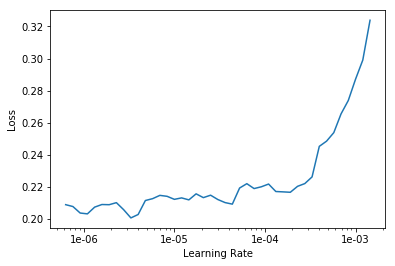

In [38]:
learn.recorder.plot()

In [39]:
learn.fit_one_cycle(2, max_lr=slice(1e-6, 2e-4))

epoch,train_loss,valid_loss,error_rate
1,0.220214,0.209225,0.072395
2,0.189306,0.205453,0.064276


In [40]:
learn.save('stage-2')

In [42]:
data = ImageDataBunch.from_name_re(path, fnames, pat=pat, size=288, bs=32, ds_tfms=get_transforms()
                                  ).normalize(imagenet_stats)

In [43]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [44]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


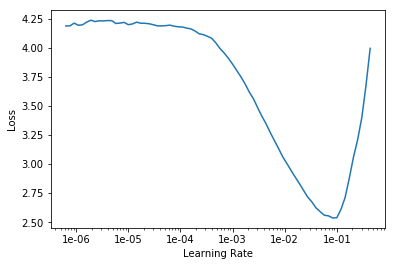

In [45]:
learn.recorder.plot()

> The "loss vs learning rate" plots from the learning rate finder for Resnet30 and Resnet50 seem qualitatively different.  Resnet30's loss is smaller than Resnet50's.  Resnet50's has a more visible dip in the loss, whereas Resnet30's loss increases with learning rate.  Resnet50 allows one to push to a higher learning rate.  Which of these observations are generally true, and not just specific to the current problem and dataset?  Can they be explained?

In [46]:
learn.fit_one_cycle(8, max_lr=slice(1e-6, 1e-2))

epoch,train_loss,valid_loss,error_rate
1,0.576852,0.335603,0.109608
2,0.563737,0.337575,0.101489
3,0.523642,0.295590,0.085927
4,0.354995,0.277302,0.078484
5,0.326460,0.276958,0.078484
6,0.223892,0.202617,0.059540
7,0.147397,0.202138,0.059540
8,0.125153,0.189968,0.056157


In [47]:
learn.save('stage-1_resnet50')

In [48]:
interp = ClassificationInterpretation.from_learner(learn)

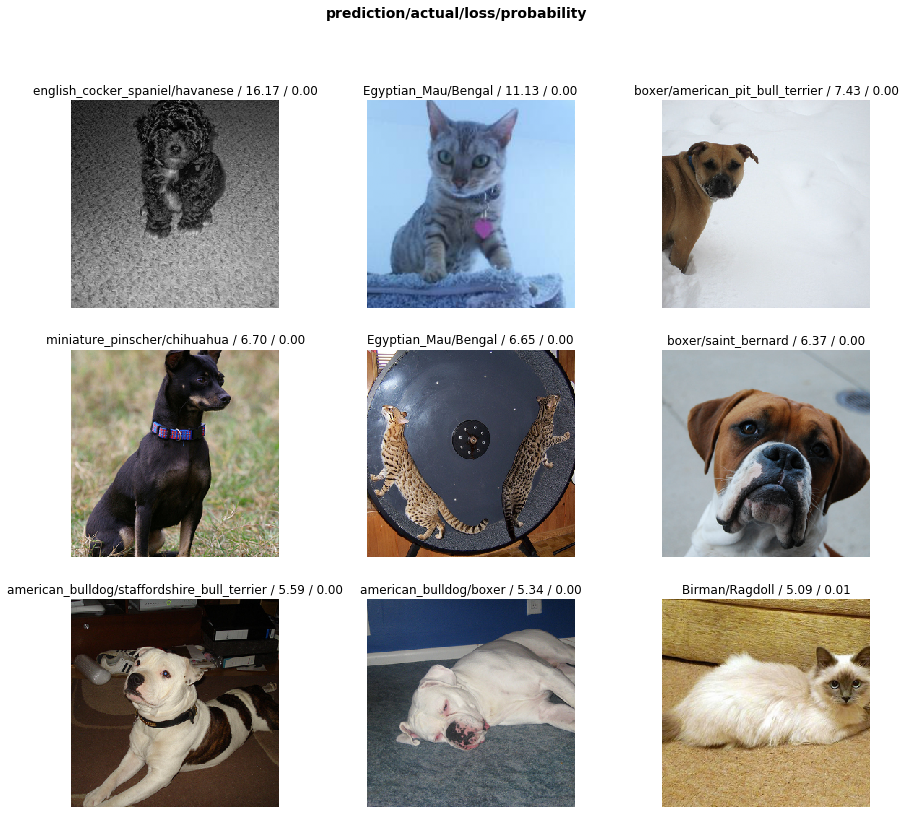

In [55]:
interp.plot_top_losses(9, figsize=(15, 13))

In [51]:
interp.most_confused(2)

[('Bengal', 'Egyptian_Mau', 7),
 ('Ragdoll', 'Birman', 5),
 ('Persian', 'Ragdoll', 4),
 ('american_pit_bull_terrier', 'american_bulldog', 4),
 ('american_pit_bull_terrier', 'miniature_pinscher', 4),
 ('staffordshire_bull_terrier', 'american_bulldog', 4),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3)]

In [56]:
doc(ImageDataBunch.from_name_re)

> I mistakenly called ImageDataBunch.from_name_re using `path`, but the subsequent steps worked fine, except that the models are now saved in `path/models`, rather than `path_img/models`.  So, the documentation for this function at https://docs.fast.ai/vision.data.html#ImageDataBunch.from_name_re seems a bit misleading, because it says: "Create from list of fnames in path with re expression pat."  `path` and `fnames` don't need to join together at some level or anything.